In [1]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed

Welcome to JupyROOT 6.22/02


In [2]:
folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/"
subfix1 = "_x1y1smear"
subfix2 = "_realseed_elosscorr"
png = ".png"
filename = "garlitetest"+subfix1+subfix2+".root"

file = ROOT.TFile(filename)
t=file.Get("t1s")      


In [3]:
hpresSeed   = ROOT.TH1D( 'hpresSeed', 'p Residuals Seed', 101, -1, 1 )
hpresKalman   = ROOT.TH1D( 'hpresKalman', 'p Residuals Kalman', 101, -1, 1 )

hsinphiresKalman   = ROOT.TH1D( 'hpsinphiKalman', 'p Residuals Kalman', 101, -1, 1)
htanlambdaresKalman   = ROOT.TH1D( 'htanlambdaKalman', 'p Residuals Kalman', 101, -1, 1 )
hpTinvresKalman   = ROOT.TH1D( 'hpTinvKalman', 'p Residuals Kalman', 101, -1, 1 )
hyresKalman   = ROOT.TH1D( 'hyresKalman', 'p Residuals Kalman', 101, -1, 1 )
hxresKalman   = ROOT.TH1D( 'hxresKalman', 'p Residuals Kalman', 101, -1, 1)

hsinphiresSeed   = ROOT.TH1D( 'hpsinphiSeed', 'p Residuals Seed', 101, -1, 1)
htanlambdaresSeed   = ROOT.TH1D( 'htanlambdaSeed', 'p Residuals Seed', 101, -1, 1 )
hpTinvresSeed   = ROOT.TH1D( 'hpTinvSeed', 'p Residuals Seed', 101, -1, 1 )
hyresSeed   = ROOT.TH1D( 'hyresSeed', 'p Residuals Seed', 101, -1, 1 )
hxresSeed   = ROOT.TH1D( 'hxresSeed', 'p Residuals Seed', 101, -1, 1)

In [4]:
for iev in range(t.GetEntries()):
    t.GetEntry(iev)
    pMC = np.sqrt(t.pxyz_firstinPlane.at(0).X()*t.pxyz_firstinPlane.at(0).X()+t.pxyz_firstinPlane.at(0).Y()*t.pxyz_firstinPlane.at(0).Y()+t.pxyz_firstinPlane.at(0).Z()*t.pxyz_firstinPlane.at(0).Z())
    invpTMC = t.invpT_plane.at(0)
    sinphiMC = t.sinphi_plane.at(0)
    tanlambdaMC = t.tanlambda_plane.at(0)
    yMC = t.xyz_plane.at(0).Y()
    xMC = t.xyz_plane.at(0).x()

    #print(invpTMC)

    pSeed = np.abs((1/np.cos(np.arctan(t.tanlambda_seed)))*(0.5*0.299792458e-2)/t.curvature_seed)
    invpTSeed = t.curvature_seed/(0.5*0.00299792458)
    sinphiSeed= t.sinphi_seed
    tanlambdaSeed=t.tanlambda_seed
    ySeed = t.xyz_seed.Y()
    xSeed = t.xyz_seed.X()

    pKalman = np.abs((1/np.cos(np.arctan(t.parvect_bkw.at(t.parvect_bkw.size()-1)[3])))/t.parvect_bkw.at(t.parvect_bkw.size()-1)[4])
    invpTKalman = t.parvect_bkw.at(t.parvect_bkw.size()-1)[4]
    sinphiKalman = t.parvect_bkw.at(t.parvect_bkw.size()-1)[2]
    tanlambdaKalman = t.parvect_bkw.at(t.parvect_bkw.size()-1)[3]
    yKalman= t.parvect_bkw.at(t.parvect_bkw.size()-1)[0]
    xKalman= t.parvect_bkw.at(t.parvect_bkw.size()-1)[1]


    #if (pSeed-pMC)/pMC>1:
        #print(invpTMC)
        #print(invpTSeed)
        #print(invpTKalman)
    #print(invpTKalman)

    hpresSeed.Fill((pSeed-pMC)/pMC)
    hsinphiresSeed.Fill((sinphiSeed-sinphiMC)/sinphiMC)
    htanlambdaresSeed.Fill((tanlambdaSeed-tanlambdaMC)/tanlambdaMC)
    hpTinvresSeed.Fill((invpTSeed-invpTMC)/invpTMC)
    hyresSeed.Fill((ySeed-yMC)/yMC)
    hxresSeed.Fill((xSeed-xMC)/xMC)

    hpresKalman.Fill((pKalman-pMC)/pMC)
    hsinphiresKalman.Fill((sinphiKalman-sinphiMC)/sinphiMC)
    htanlambdaresKalman.Fill((tanlambdaKalman-tanlambdaMC)/tanlambdaMC)
    hpTinvresKalman.Fill((invpTKalman-invpTMC)/invpTMC)
    hyresKalman.Fill((yKalman-yMC)/yMC)
    hxresKalman.Fill((xKalman-xMC)/xMC)

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/pres_x1y1smear_realseed_elosscorr.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/p0res_x1y1smear_realseed_elosscorr.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/p1res_x1y1smear_realseed_elosscorr.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/p2res_x1y1smear_realseed_elosscorr.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/p3res_x1y1smear_realseed_elosscorr.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/p4res_x

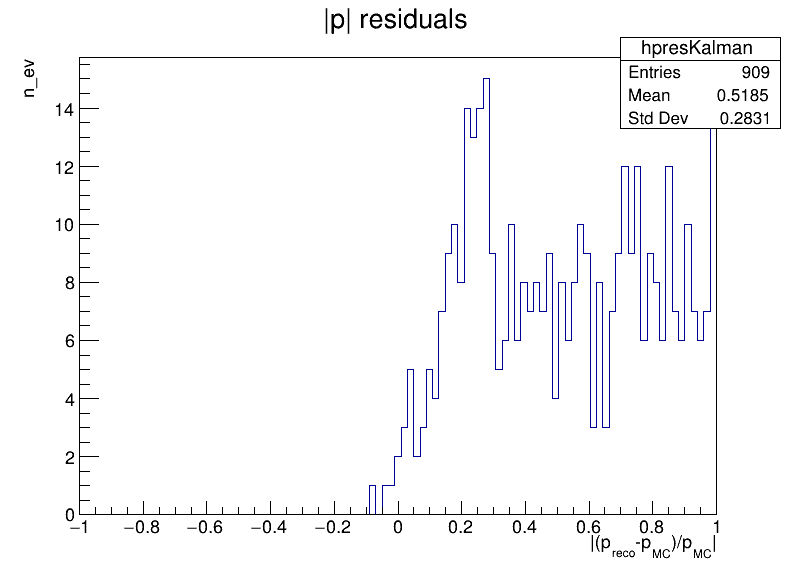

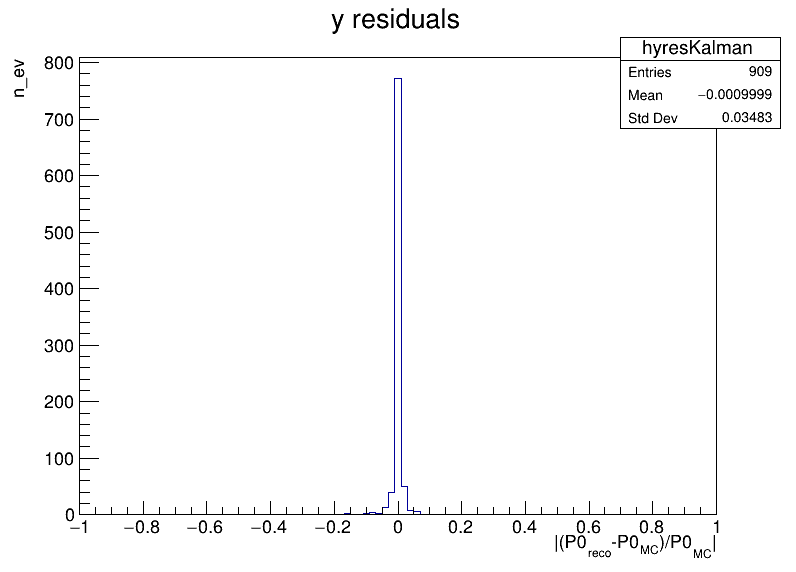

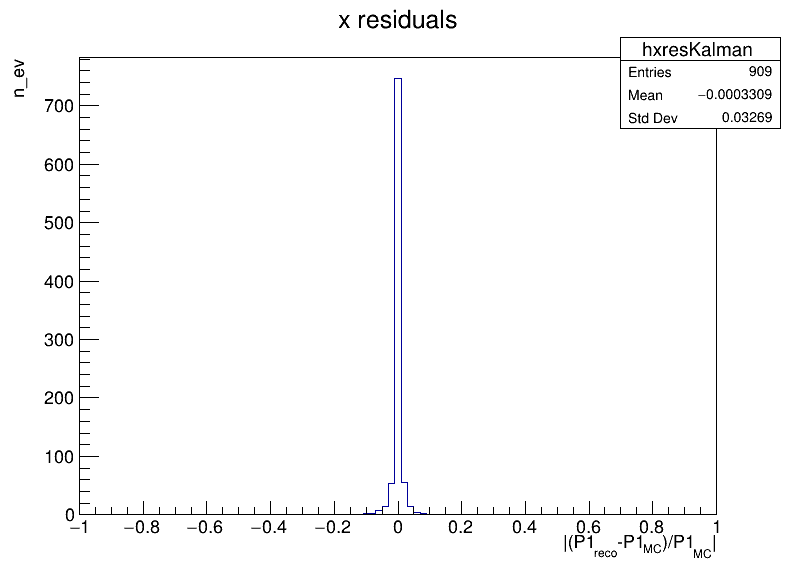

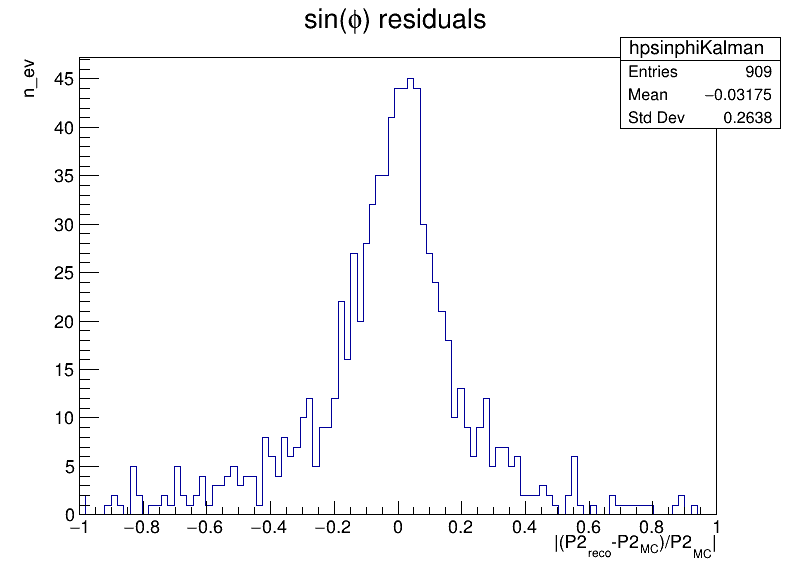

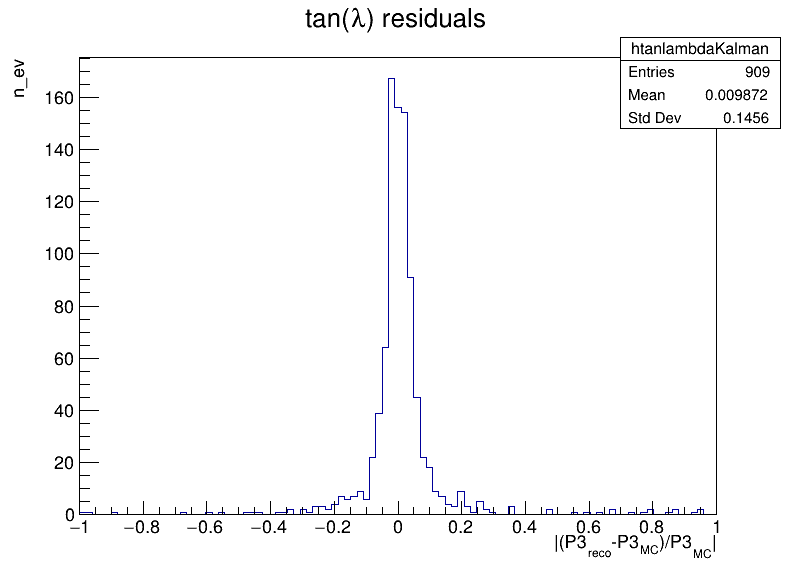

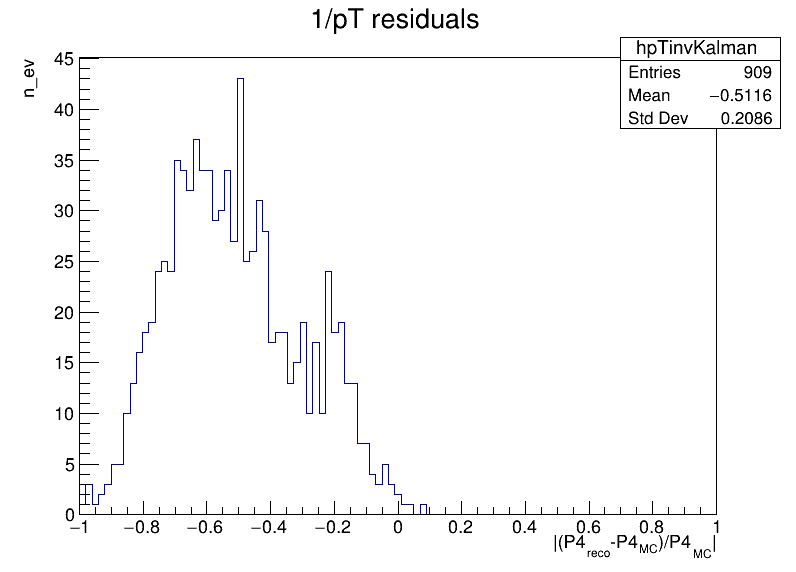

In [5]:
cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
hpresKalman.SetTitle("|p| residuals;|(p_{reco}-p_{MC})/p_{MC}|;n_ev")
hpresKalman.Draw()
cp.Draw()
save=folder+"pres"+subfix1+subfix2+png
cp.Print(save)

c0 = ROOT.TCanvas("myCanvasName0","The Canvas Title0",800,600)
hyresKalman.SetTitle("y residuals;|(P0_{reco}-P0_{MC})/P0_{MC}|;n_ev")
hyresKalman.Draw()
c0.Draw()
save=folder+"p0res"+subfix1+subfix2+png
c0.Print(save)

c1 = ROOT.TCanvas("myCanvasName1","The Canvas Title1",800,600)
hxresKalman.SetTitle("x residuals;|(P1_{reco}-P1_{MC})/P1_{MC}|;n_ev")
hxresKalman.Draw()
c1.Draw()
save=folder+"p1res"+subfix1+subfix2+png
c1.Print(save)

c2 = ROOT.TCanvas("myCanvasName2","The Canvas Title2",800,600)
hsinphiresKalman.SetTitle("sin(#phi) residuals;|(P2_{reco}-P2_{MC})/P2_{MC}|;n_ev")
hsinphiresKalman.Draw()
c2.Draw()
save=folder+"p2res"+subfix1+subfix2+png
c2.Print(save)

c3 = ROOT.TCanvas("myCanvasName3","The Canvas Title3",800,600)
htanlambdaresKalman.SetTitle("tan(#lambda) residuals;|(P3_{reco}-P3_{MC})/P3_{MC}|;n_ev")
htanlambdaresKalman.Draw()
c3.Draw()
save=folder+"p3res"+subfix1+subfix2+png
c3.Print(save)

c4 = ROOT.TCanvas("myCanvasName4","The Canvas Title4",800,600)
hpTinvresKalman.SetTitle("1/pT residuals;|(P4_{reco}-P4_{MC})/P4_{MC}|;n_ev")
hpTinvresKalman.Draw()
c4.Draw()
save=folder+"p4res"+subfix1+subfix2+png
c4.Print(save)

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/helix_pres_x1y1smear_realseed_elosscorr.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/helix_p0res_x1y1smear_realseed_elosscorr.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/helix_p1res_x1y1smear_realseed_elosscorr.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/helix_p2res_x1y1smear_realseed_elosscorr.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/helix_p3res_x1y1smear_realseed_elosscorr.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Oxford

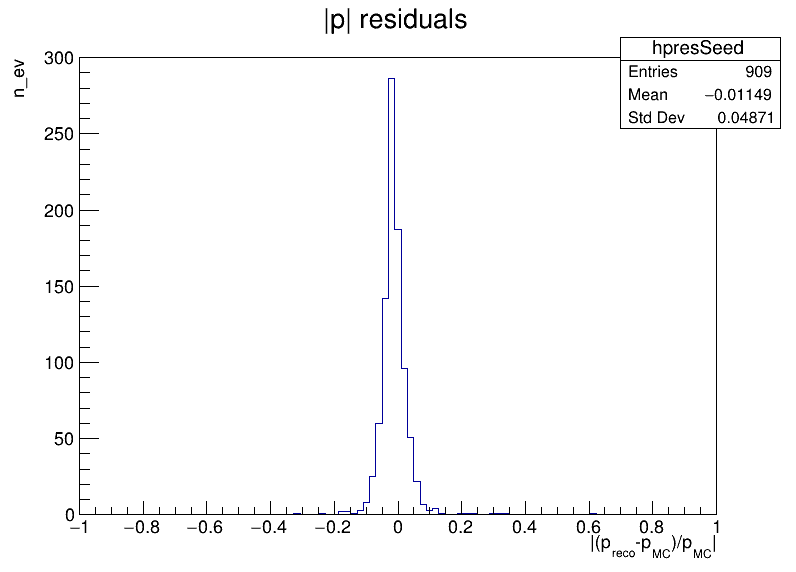

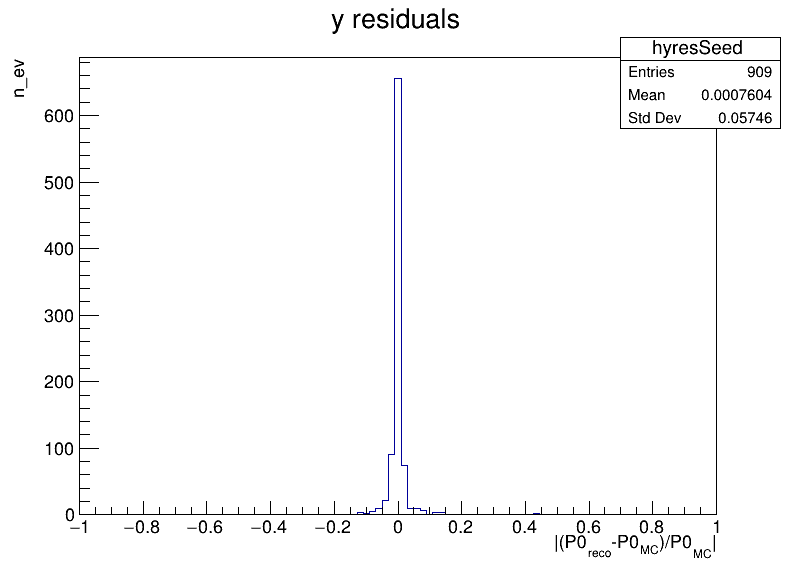

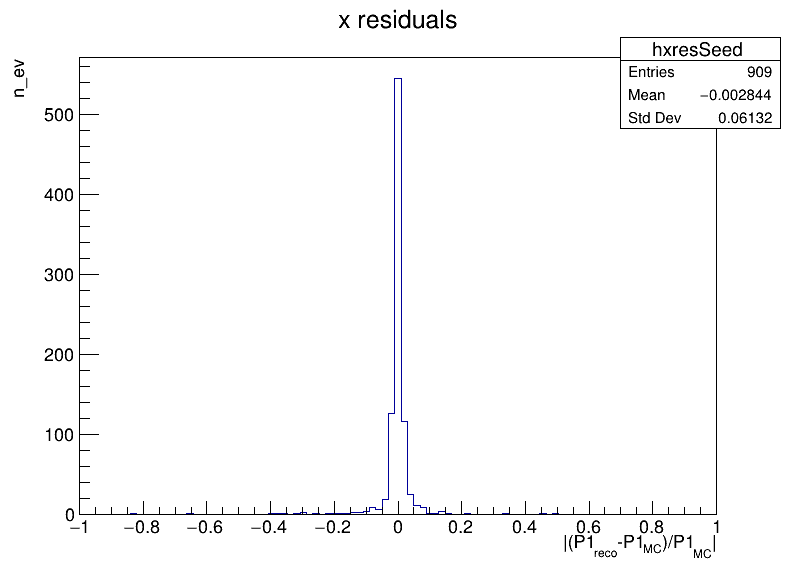

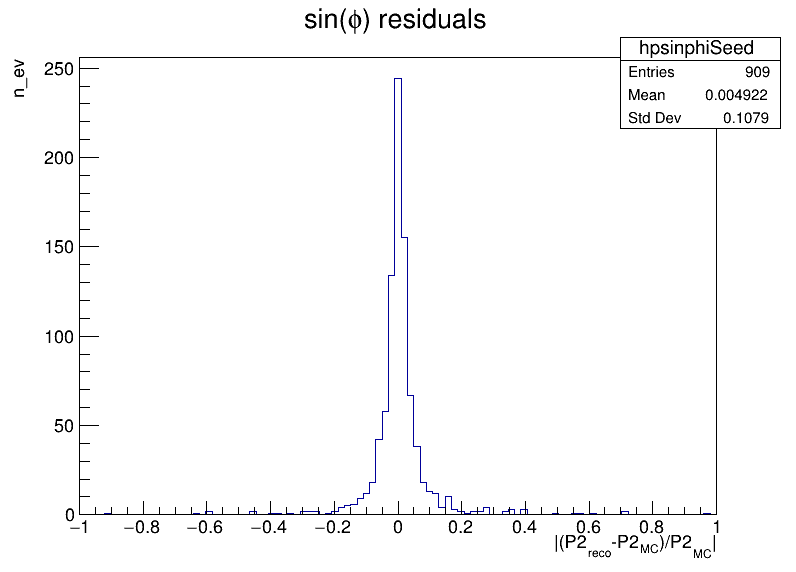

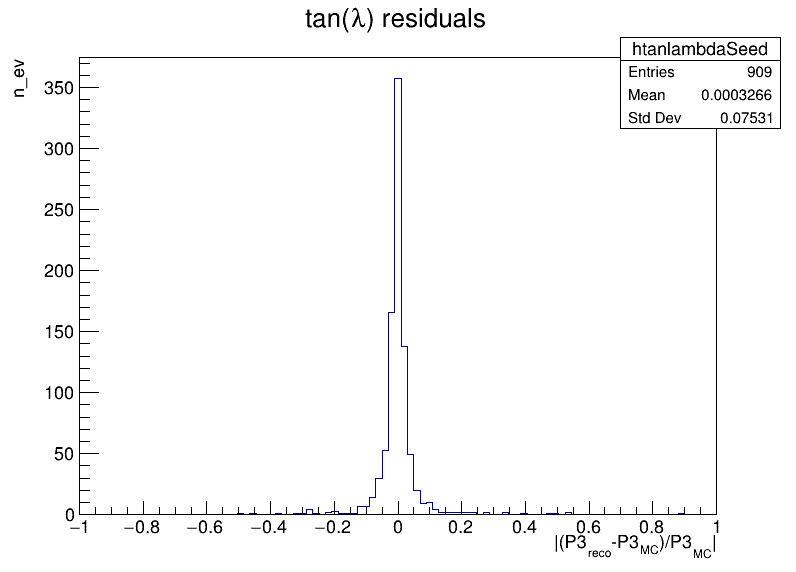

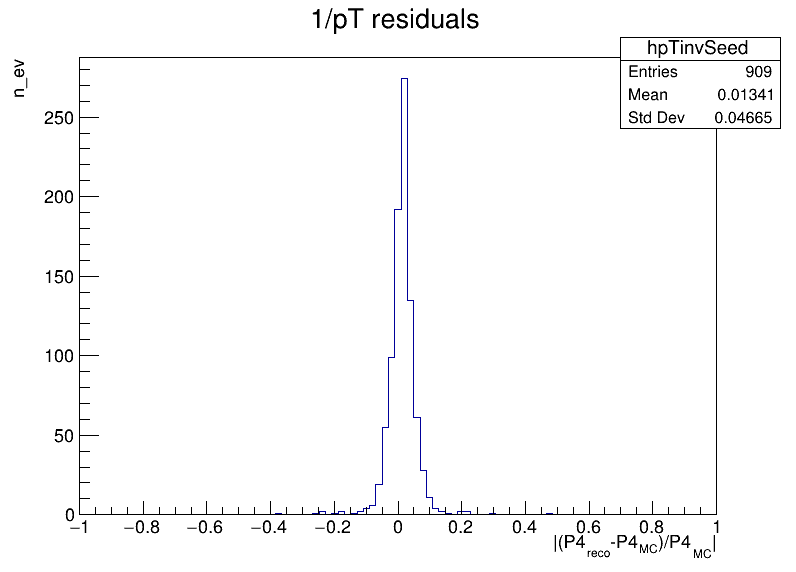

In [6]:
cps = ROOT.TCanvas("myCanvasNameps","The Canvas Titleps",800,600)
hpresSeed.SetTitle("|p| residuals;|(p_{reco}-p_{MC})/p_{MC}|;n_ev")
hpresSeed.Draw()
cps.Draw()
save=folder+"helix_"+"pres"+subfix1+subfix2+png
cps.Print(save)

c0s = ROOT.TCanvas("myCanvasName0s","The Canvas Title0s",800,600)
hyresSeed.SetTitle("y residuals;|(P0_{reco}-P0_{MC})/P0_{MC}|;n_ev")
hyresSeed.Draw()
c0s.Draw()
save=folder+"helix_"+"p0res"+subfix1+subfix2+png
c0s.Print(save)

c1s = ROOT.TCanvas("myCanvasName1s","The Canvas Title1s",800,600)
hxresSeed.SetTitle("x residuals;|(P1_{reco}-P1_{MC})/P1_{MC}|;n_ev")
hxresSeed.Draw()
c1s.Draw()
save=folder+"helix_"+"p1res"+subfix1+subfix2+png
c1s.Print(save)

c2s = ROOT.TCanvas("myCanvasName2s","The Canvas Title2s",800,600)
hsinphiresSeed.SetTitle("sin(#phi) residuals;|(P2_{reco}-P2_{MC})/P2_{MC}|;n_ev")
hsinphiresSeed.Draw()
c2s.Draw()
save=folder+"helix_"+"p2res"+subfix1+subfix2+png
c2s.Print(save)

c3s = ROOT.TCanvas("myCanvasName3s","The Canvas Title3s",800,600)
htanlambdaresSeed.SetTitle("tan(#lambda) residuals;|(P3_{reco}-P3_{MC})/P3_{MC}|;n_ev")
htanlambdaresSeed.Draw()
c3s.Draw()
save=folder+"helix_"+"p3res"+subfix1+subfix2+png
c3s.Print(save)

c4s = ROOT.TCanvas("myCanvasName4s","The Canvas Title4s",800,600)
hpTinvresSeed.SetTitle("1/pT residuals;|(P4_{reco}-P4_{MC})/P4_{MC}|;n_ev")
hpTinvresSeed.Draw()
c4s.Draw()
save=folder+"helix_"+"p4res"+subfix1+subfix2+png
c4s.Print(save)

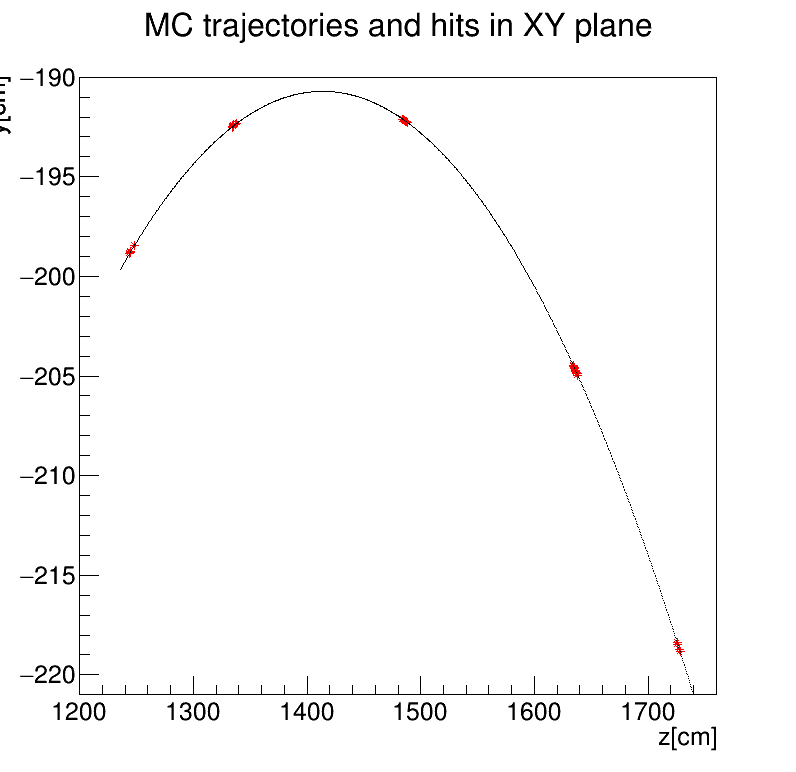

In [7]:
ct = ROOT.TCanvas("myCanvasNamet","The Canvas Titlet",800,800)
t.Draw("xyz_plane.fCoordinates.fY:xyz_plane.fCoordinates.fZ","","",1,2)
t.Draw("xyz.fCoordinates.fY:xyz.fCoordinates.fZ","","SAME",1,2)
h = ROOT.TH1F
h = gPad.GetListOfPrimitives().At(3)
h.SetMarkerColor(kRed)
h.SetMarkerStyle(3)
h.SetMarkerSize(1)
h = gPad.GetListOfPrimitives().At(1)
h.SetTitle("MC trajectories and hits in XY plane; z[cm]; y[cm]")
#t.Draw("xyz.fCoordinates.fY:xyz.fCoordinates.fZ","","SAME",1,2)

ct.Draw()

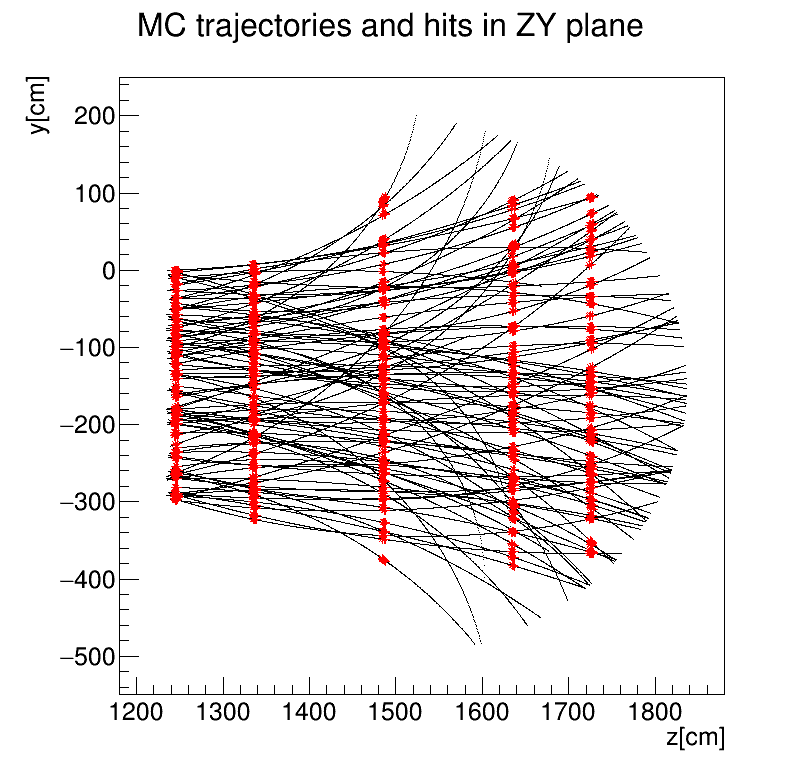

In [8]:
ctnew = ROOT.TCanvas("myCanvasNametnew","The Canvas Titletnew",800,800)
ctnew.SetRightMargin(0.09)
ctnew.SetLeftMargin(0.15)
t.Draw("xyz.fCoordinates.fY:xyz.fCoordinates.fZ","","",100,2)
t.Draw("xyz_plane.fCoordinates.fY:xyz_plane.fCoordinates.fZ","","SAME",100,2)
h2 = ROOT.TH1F
h2 = gPad.GetListOfPrimitives().At(4)
h2.SetMarkerColor(kRed)
h2.SetMarkerStyle(3)
h2.SetMarkerSize(1)
h2 = gPad.GetListOfPrimitives().At(1)
h2.SetTitle("MC trajectories and hits in ZY plane; z[cm]; y[cm]")
#t.Draw("xyz.fCoordinates.fY:xyz.fCoordinates.fZ","","SAME",1,2)
ctnew.Draw()